<a href="https://colab.research.google.com/github/Neeha8/SVM/blob/main/SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Import Libraries

In [1]:
import pandas as pd
import numpy as np
from sklearn import svm
import matplotlib.pyplot as plt
%matplotlib inline 

In [2]:
lData = pd.read_csv("/content/letterdata.csv")
lData.head(10) 

,letter,xbox,ybox,width,height,onpix,xbar,ybar,x2bar,y2bar,xybar,x2ybar,xy2bar,xedge,xedgey,yedge,yedgex
0,T,2,8,3,5,1,8,13,0,6,6,10,8,0,8,0,8
1,I,5,12,3,7,2,10,5,5,4,13,3,9,2,8,4,10
2,D,4,11,6,8,6,10,6,2,6,10,3,7,3,7,3,9
3,N,7,11,6,6,3,5,9,4,6,4,4,10,6,10,2,8
4,G,2,1,3,1,1,8,6,6,6,6,5,9,1,7,5,10
5,S,4,11,5,8,3,8,8,6,9,5,6,6,0,8,9,7
6,B,4,2,5,4,4,8,7,6,6,7,6,6,2,8,7,10
7,A,1,1,3,2,1,8,2,2,2,8,2,8,1,6,2,7
8,J,2,2,4,4,2,10,6,2,6,12,4,8,1,6,1,7
9,M,11,15,13,9,7,13,2,6,2,12,1,9,8,1,1,8


## Split Data

In [3]:
X,y = np.array(lData)[ :, 1:16], np.array(lData.letter)[:]  

In [4]:
X_train = X[:16000, :]
X_test = X[16001: , :]
y_train = y[:16000]
y_test = y[16001:]

## Build Model

In [5]:
clf = svm.SVC(C=3)    

In [6]:
clf.fit(X_train , y_train)

SVC(C=3)

In [7]:
y_pred = clf.predict(X_test)

In [8]:
y_grid = (np.column_stack([y_test, y_pred]))

In [9]:
print(y_grid)

[['N' 'N']
 ['V' 'V']
 ['I' 'I']
 ...
 ['T' 'T']
 ['S' 'S']
 ['A' 'A']]


### 

In [10]:
import string
lab= list(string.ascii_uppercase[0:26])
plab=["Pr "+s for s in lab]

In [12]:
from sklearn import metrics
import seaborn as sns

cm=metrics.confusion_matrix(y_test, y_pred, labels=lab)

df_cm = pd.DataFrame(cm, index = [i for i in lab],
                  columns = [i for i in plab])


<Axes: >

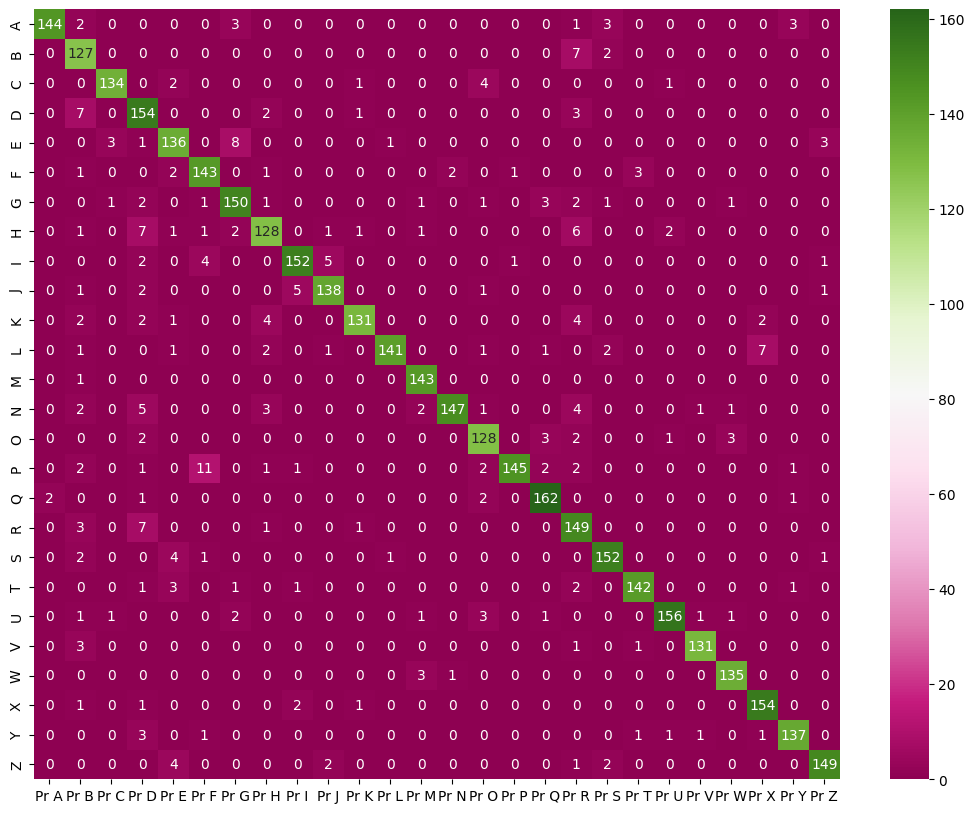

In [14]:
plt.figure(figsize = (13,10))
sns.heatmap(df_cm, annot=True ,fmt='g', cmap="PiYG")